# Coursework 1
Dataset used Wine Quality (red wine)
Dataset link :

### Importing and exploring data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer

In [ ]:
from google.colab import files
upload = files.upload()
# data = pd.read_csv("Datasets/wine+quality/winequality-red.csv",sep=";")
data = pd.read_csv("winequality-red.csv",sep=";")

Saving winequality-red.csv to winequality-red (3).csv


In [ ]:
df = pd.DataFrame(data)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
print("before removing duplicates : ",df.duplicated().sum())

before removing duplicates :  240


In [ ]:
df2 = df.drop_duplicates()
print(df2.duplicated().sum())

0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


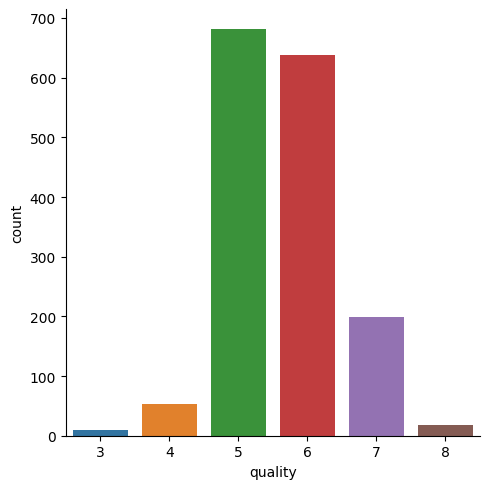

In [ ]:
sns.catplot(x='quality',data=data,kind='count')

<Axes: xlabel='quality', ylabel='alcohol'>

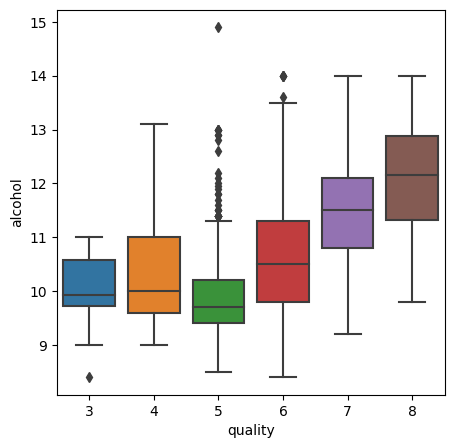

In [ ]:
#alcohol vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='alcohol',data=data)  #higher the quantity better the quality

<Axes: xlabel='quality', ylabel='sulphates'>

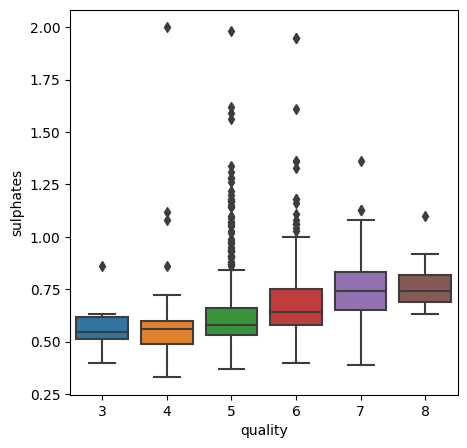

In [ ]:
# sulphates vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='sulphates',data=data)

<Axes: xlabel='quality', ylabel='pH'>

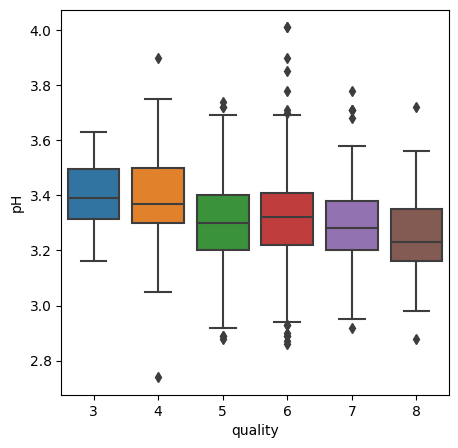

In [ ]:
# ph vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='pH',data=data)

<Axes: xlabel='quality', ylabel='density'>

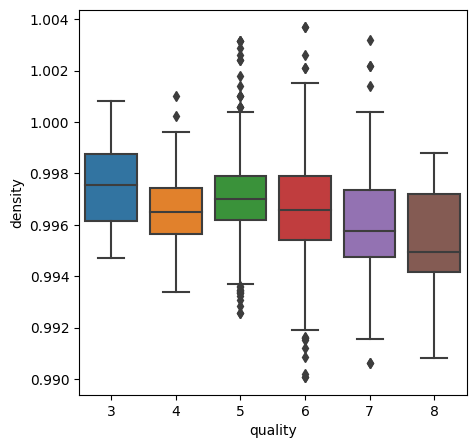

In [ ]:
# density vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='density',data=data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

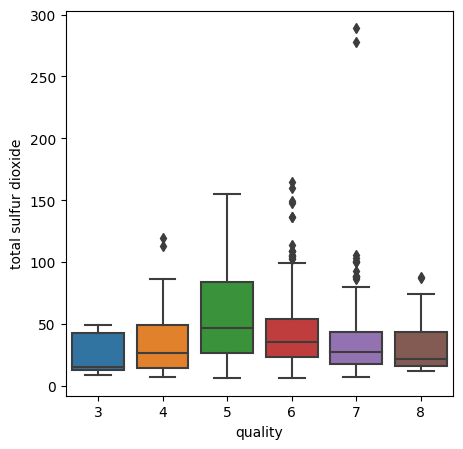

In [ ]:
# total sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

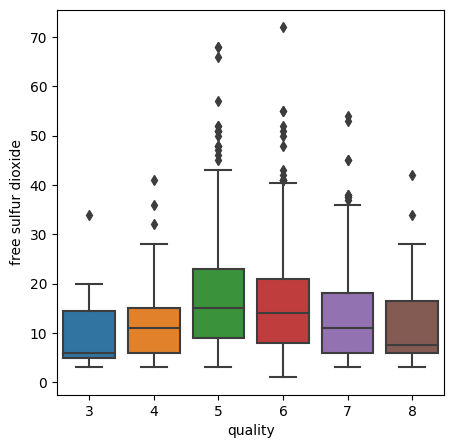

In [ ]:
#free sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='free sulfur dioxide',data=data)

<Axes: xlabel='quality', ylabel='chlorides'>

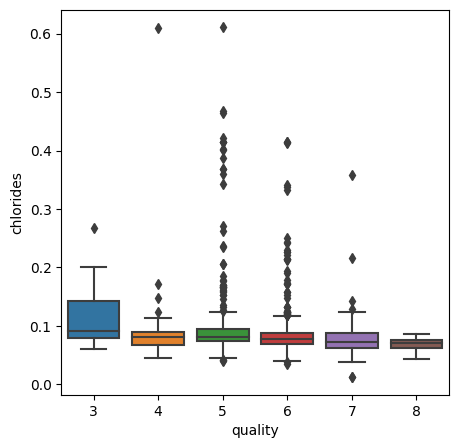

In [ ]:
#chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='chlorides',data=data)

<Axes: xlabel='quality', ylabel='residual sugar'>

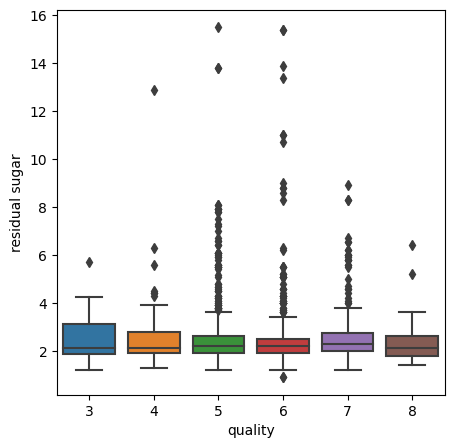

In [ ]:
#residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='residual sugar',data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

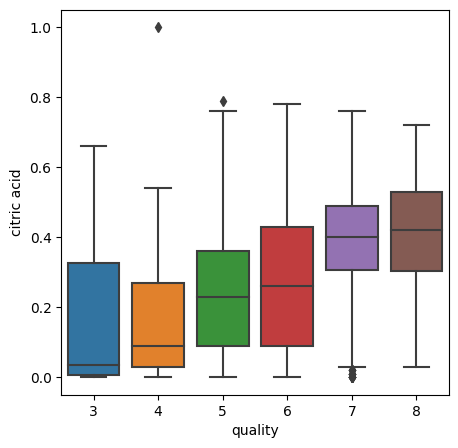

In [ ]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='citric acid',data=data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

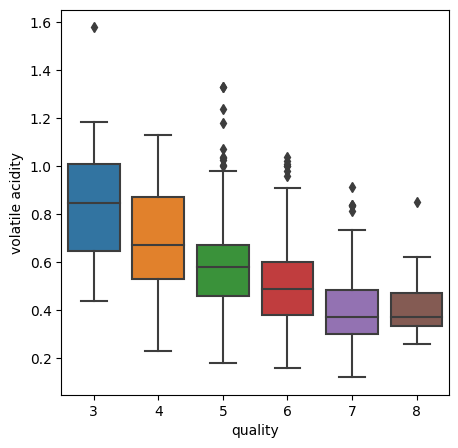

In [ ]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='volatile acidity',data=data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

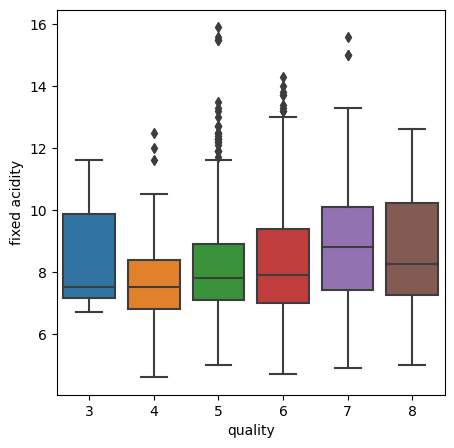

In [ ]:
#fixed acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality',y='fixed acidity',data=data)

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

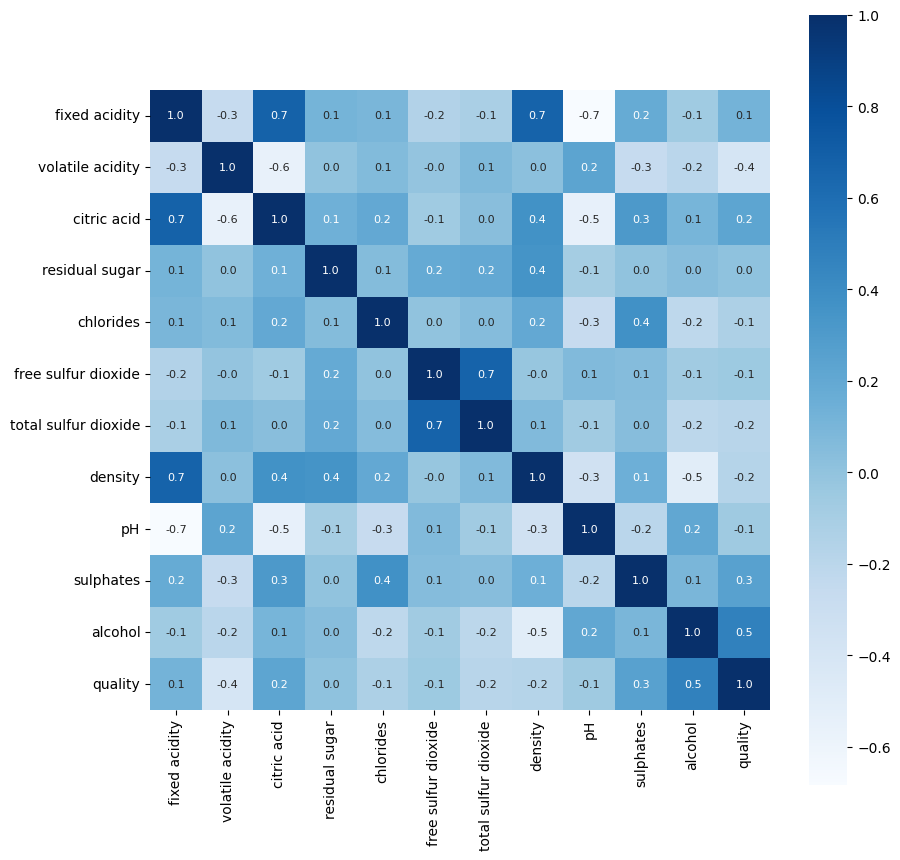

In [ ]:
#constructing heatmap to understand the corelation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
 X = data[['alcohol','volatile acidity','sulphates','total sulfur dioxide']]

In [ ]:
y=data['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.39916200215220154
R-squared: 0.38919904630395796


### Using Cross fold validation

In [ ]:
# Create K-fold for cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#### Model 1: Linear Regression

In [ ]:
lin_reg = LinearRegression()
cfv_scores_lin = cross_val_score(lin_reg, X, y, cv=kfold,scoring = make_scorer(mean_squared_error))
print("Linear Regression cross fold validation mean score:", np.mean(cfv_scores_lin))

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_linearreg = mse

print("Linear Regression MSE",mse)
print("Linear Regression R squre",r2)


Linear Regression cross fold validation mean score: 0.4317249284981223
Linear Regression MSE 0.39916200215220154
Linear Regression R squre 0.38919904630395796


#### Model 2: SVM Regression

In [ ]:
# Create an SVM Regressor
from sklearn.svm import SVR
svm_reg = SVR()

param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],  # Log-uniform distribution for 'C'
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),  # Values for 'gamma'
}

grid_search = GridSearchCV(svm_reg, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

print("Best Params",grid_search.best_params_)

svm_reg = SVR(**grid_search.best_params_)

cfv_scores_svm = cross_val_score(svm_reg, X, y, cv=kfold,scoring = make_scorer(mean_squared_error))
print("SVM Regression cross fold validation mean score:", np.mean(cfv_scores_svm))

svm_reg.fit(x_train, y_train)

y_pred = svm_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_svm = mse

print("Support Vector Regression MSE:",mse)
print("Support Vector R squre",r2)

Best Params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Regression cross fold validation mean score: 0.43016679637391564
Support Vector Regression MSE: 0.41008268484793664
Support Vector R squre 0.3724881285071697


#### Model 3: Decision Trees

In [ ]:
# Create a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
cfv_scores_dt = cross_val_score(dt_reg, X, y, cv=kfold,scoring = make_scorer(mean_squared_error))
print("Decision Trees cross fold validation mean score:", np.mean(cfv_scores_dt))

dt_reg.fit(x_train, y_train)

y_pred = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_dt = mse

print("Decision Trees MSE:",mse)
print("Decision Trees R squre",r2)

Decision Trees cross fold validation mean score: 0.6297766457680252
Decision Trees MSE: 0.709375
Decision Trees R squre -0.08549141499424673


#### Model 4: Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
# Initialize the MLPRegressor with your desired parameters
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50),
                   activation='identity',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

In [ ]:
cfv_scores_mlp = cross_val_score(mlp_reg, X, y, cv=kfold,scoring = make_scorer(mean_squared_error))


print("MLP Neural Network Regression cross fold validation mean score:", np.mean(cfv_scores_mlp))

mlp_reg.fit(x_train, y_train)

y_pred = mlp_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_mlp = mse

print("MLP MSE:",mse)
print("MLP R sqaure",r2)

MLP Neural Network Regression cross fold validation mean score: 0.4994503909155674
MLP MSE: 0.4937842903592598
MLP R sqaure 0.24440724857233076


#### Final Comparison of Models based on Cross Validation scores


In [ ]:
print("Linear Regression cross fold validation mean score:", np.mean(cfv_scores_lin))
print("SVM Regression cross fold validation mean score:", np.mean(cfv_scores_svm))
print("Decision Trees cross fold validation mean score:", np.mean(cfv_scores_dt))
print("MLP Neural Network Regression cross fold validation mean score:", np.mean(cfv_scores_mlp))

Linear Regression cross fold validation mean score: 0.4317249284981223
SVM Regression cross fold validation mean score: 0.43016679637391564
Decision Trees cross fold validation mean score: 0.6297766457680252
MLP Neural Network Regression cross fold validation mean score: 0.4994503909155674


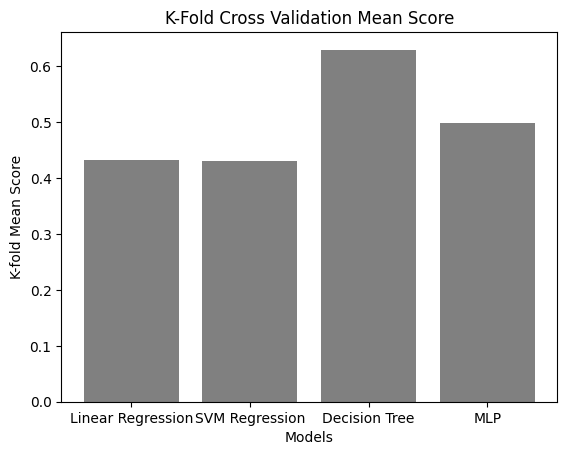

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

categories = ['Linear Regression', 'SVM Regression', 'Decision Tree', 'MLP']
values = [np.mean(cfv_scores_lin), np.mean(cfv_scores_svm), np.mean(cfv_scores_dt), np.mean(cfv_scores_mlp)]


plt.bar(categories, values, color='gray')

plt.xlabel('Models')
plt.ylabel('K-fold Mean Score')
plt.title('K-Fold Cross Validation Mean Score')


plt.show()

plt.savefig('kfold_bar_graph')

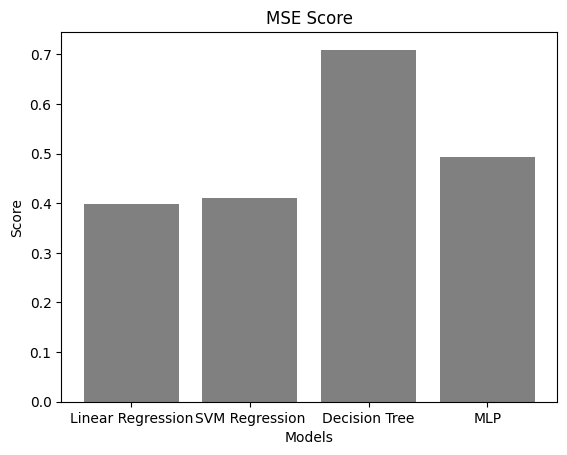

<Figure size 640x480 with 0 Axes>

In [ ]:
categories = ['Linear Regression', 'SVM Regression', 'Decision Tree', 'MLP']
values = [mse_linearreg, mse_svm, mse_dt, mse_mlp]


plt.bar(categories, values, color='gray')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('MSE Score')


plt.show()

plt.savefig('mse_bar_graph')